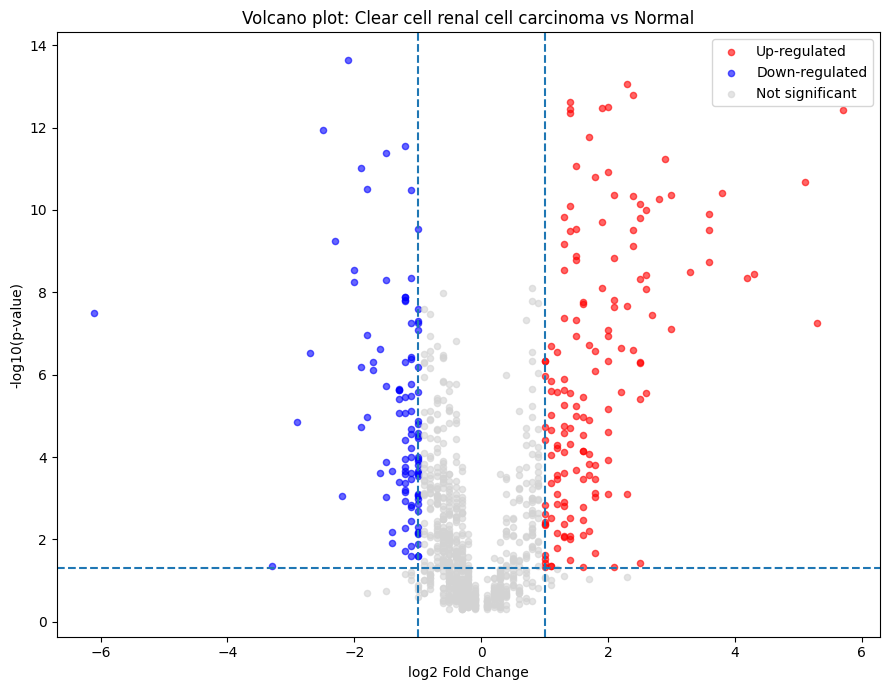

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Percorso del file dei risultati differenziali
file_path = r"C:\Users\Msi\OneDrive\Desktop\Nuova cartella\data\E-PROT-59-query-results.tsv"

# Caricamento dati (saltando le righe di commento iniziali)
df = pd.read_csv(file_path, sep="\t", comment='#')

# Colonne di interesse per la comparazione principale
fold_change_col = "'clear cell renal cell carcinoma' vs 'normal' .foldChange"
pvalue_col = "'clear cell renal cell carcinoma' vs 'normal'.pValue"

# Pulizia dei dati
df = df[[ "Gene ID", "Gene Name", fold_change_col, pvalue_col ]].dropna()



# Calcolo -log10(p-value)
df["minus_log10_pvalue"] = -np.log10(df[pvalue_col])

# Classificazione biologica dei geni
def classify_gene(row):
    if row[pvalue_col] < 0.05 and row[fold_change_col] >= 1:
        return "Up-regulated"
    elif row[pvalue_col] < 0.05 and row[fold_change_col] <= -1:
        return "Down-regulated"
    else:
        return "Not significant"

df["Regulation"] = df.apply(classify_gene, axis=1)

# Controllo delle classi
df["Regulation"].value_counts()




plt.figure(figsize=(9,7))

# Scatter per ciascuna categoria
colors = {
    "Up-regulated": "red",
    "Down-regulated": "blue",
    "Not significant": "lightgrey"
}

for category, color in colors.items():
    subset = df[df["Regulation"] == category]
    plt.scatter(
        subset[fold_change_col],
        subset["minus_log10_pvalue"],
        c=color,
        label=category,
        alpha=0.6,
        s=20
    )

# Linee di soglia
plt.axhline(-np.log10(0.05), linestyle="--")
plt.axvline(1, linestyle="--")
plt.axvline(-1, linestyle="--")

# Etichette e titolo
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano plot: Clear cell renal cell carcinoma vs Normal")
plt.legend()
plt.tight_layout()
plt.show()



